In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
import json
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations. Declare each array as a variable.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.Unpack the zip object into a list so that you only have to create it once.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Use Enumerate 
#method to get the index of hte city and the city to create an endpoint URL.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | xuchang
Processing Record 7 of Set 1 | itaqui
Processing Record 8 of Set 1 | thinadhoo
Processing Record 9 of Set 1 | vestmannaeyjar
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | ongandjera
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | ukiah
Processing Record 21 of Set 1 | kununurra
Processing Recor

City not found. Skipping...
Processing Record 37 of Set 4 | sakakah
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | semenivka
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | manado
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | nakhon phanom
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | flin flon
Processing Record 47 of Set 4 | kloulklubed
Processing Record 48 of Set 4 | ixtapa
Processing Record 49 of Set 4 | lac-megantic
Processing Record 50 of Set 4 | hobyo
Processing Record 1 of Set 5 | dumka
Processing Record 2 of Set 5 | longlac
City not found. Skipping...
Processing Record 3 of Set 5 | curitibanos
Processing Record 4 of Set 5 | karamay
City not found. Skipping...
Processing Record 5 of Set 5 | mount isa
Processing Record 6 of Set 5 | cayenne
Processing Record 7 of Set 5 |

City not found. Skipping...
Processing Record 28 of Set 8 | geraldton
Processing Record 29 of Set 8 | washougal
Processing Record 30 of Set 8 | kajaani
Processing Record 31 of Set 8 | the pas
Processing Record 32 of Set 8 | lodeynoye pole
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | daru
Processing Record 35 of Set 8 | korhogo
Processing Record 36 of Set 8 | ijaki
City not found. Skipping...
Processing Record 37 of Set 8 | mengcheng
Processing Record 38 of Set 8 | santa maria
Processing Record 39 of Set 8 | halifax
Processing Record 40 of Set 8 | nabire
Processing Record 41 of Set 8 | oeiras
Processing Record 42 of Set 8 | nara
Processing Record 43 of Set 8 | kanniyakumari
Processing Record 44 of Set 8 | grafton
Processing Record 45 of Set 8 | san policarpo
Processing Record 46 of Set 8 | tabo-o
City not found. Skipping...
Processing Record 47 of Set 8 | laguna de perlas
Processing Record 48 of Set 8 | meulaboh
Processing Record 49 of Set 8 | kaeo
Processing R

Processing Record 16 of Set 12 | basco
Processing Record 17 of Set 12 | bilsi
Processing Record 18 of Set 12 | sol-iletsk
Processing Record 19 of Set 12 | beira
Processing Record 20 of Set 12 | diveyevo
Processing Record 21 of Set 12 | pontianak
Processing Record 22 of Set 12 | aquiraz
Processing Record 23 of Set 12 | walvis bay
Processing Record 24 of Set 12 | hirara
Processing Record 25 of Set 12 | batagay-alyta
Processing Record 26 of Set 12 | bemidji
Processing Record 27 of Set 12 | bilma
Processing Record 28 of Set 12 | robertsport
Processing Record 29 of Set 12 | mae hong son
Processing Record 30 of Set 12 | vicuna
Processing Record 31 of Set 12 | orapa
Processing Record 32 of Set 12 | fostoria
Processing Record 33 of Set 12 | buala
Processing Record 34 of Set 12 | tula
Processing Record 35 of Set 12 | turukhansk
Processing Record 36 of Set 12 | george
Processing Record 37 of Set 12 | waqqas
Processing Record 38 of Set 12 | kirakira
Processing Record 39 of Set 12 | saint-leu
Proc

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,50.63,65,86,16.82,NZ,2021-10-14 23:38:46
1,Ilulissat,69.2167,-51.1000,32.02,93,97,3.44,GL,2021-10-14 23:39:14
2,Puerto Ayora,-0.7393,-90.3518,69.85,76,61,11.52,EC,2021-10-14 23:38:49
3,Georgetown,5.4112,100.3354,82.33,93,20,1.99,MY,2021-10-14 23:38:41
4,Xuchang,34.0167,113.8167,61.68,78,98,4.54,CN,2021-10-14 23:39:15
5,Itaqui,-29.1253,-56.5531,70.11,89,62,6.40,BR,2021-10-14 23:39:15
6,Thinadhoo,0.5333,72.9333,83.30,76,90,24.36,MV,2021-10-14 23:39:16
7,Vestmannaeyjar,63.4427,-20.2734,44.35,72,60,22.03,IS,2021-10-14 23:39:16
8,Souillac,-20.5167,57.5167,71.98,83,40,6.91,MU,2021-10-14 23:39:17
9,Hobart,-42.8794,147.3294,59.02,95,75,3.00,AU,2021-10-14 23:37:43


In [8]:
#Reorder the columns and print DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-10-14 23:38:46,-46.6000,168.3333,50.63,65,86,16.82
1,Ilulissat,GL,2021-10-14 23:39:14,69.2167,-51.1000,32.02,93,97,3.44
2,Puerto Ayora,EC,2021-10-14 23:38:49,-0.7393,-90.3518,69.85,76,61,11.52
3,Georgetown,MY,2021-10-14 23:38:41,5.4112,100.3354,82.33,93,20,1.99
4,Xuchang,CN,2021-10-14 23:39:15,34.0167,113.8167,61.68,78,98,4.54
5,Itaqui,BR,2021-10-14 23:39:15,-29.1253,-56.5531,70.11,89,62,6.40
6,Thinadhoo,MV,2021-10-14 23:39:16,0.5333,72.9333,83.30,76,90,24.36
7,Vestmannaeyjar,IS,2021-10-14 23:39:16,63.4427,-20.2734,44.35,72,60,22.03
8,Souillac,MU,2021-10-14 23:39:17,-20.5167,57.5167,71.98,83,40,6.91
9,Hobart,AU,2021-10-14 23:37:43,-42.8794,147.3294,59.02,95,75,3.00


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

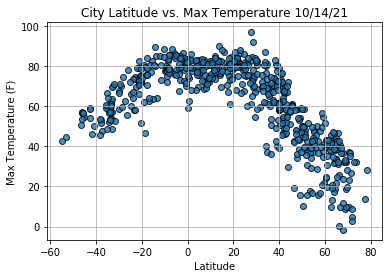

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

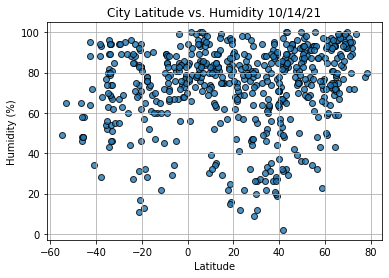

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

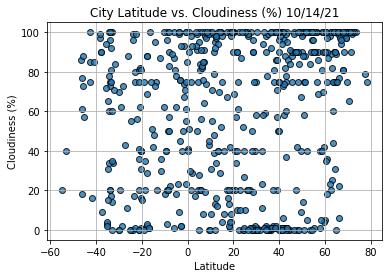

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

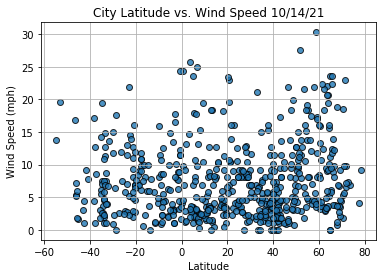

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#Access one row of the dataframe.
index13 = city_data_df.loc[13]
index13

City                   Ongandjera
Country                        NA
Date          2021-10-14 23:39:18
Lat                      -17.8833
Lng                       15.0667
Max Temp                    70.54
Humidity                       28
Cloudiness                      2
Wind Speed                  11.81
Name: 13, dtype: object

In [17]:
#Filter data
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
576     True
577     True
578     True
579     True
580    False
Name: Lat, Length: 581, dtype: bool

In [18]:
#Return all data fiting the criteria into a DataFrame.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ilulissat,GL,2021-10-14 23:39:14,69.2167,-51.1000,32.02,93,97,3.44
3,Georgetown,MY,2021-10-14 23:38:41,5.4112,100.3354,82.33,93,20,1.99
4,Xuchang,CN,2021-10-14 23:39:15,34.0167,113.8167,61.68,78,98,4.54
6,Thinadhoo,MV,2021-10-14 23:39:16,0.5333,72.9333,83.30,76,90,24.36
7,Vestmannaeyjar,IS,2021-10-14 23:39:16,63.4427,-20.2734,44.35,72,60,22.03


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

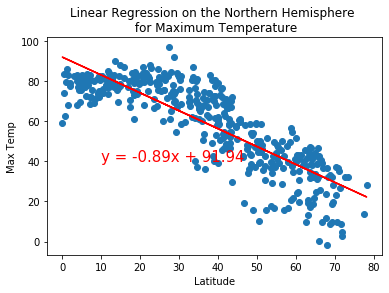

In [20]:
# Call the plot_linear_regression function with x and y values.
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))                       

In [21]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.846


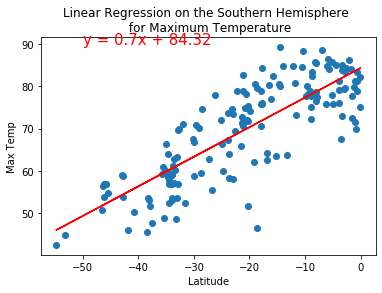

In [22]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90)) 

In [23]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.821


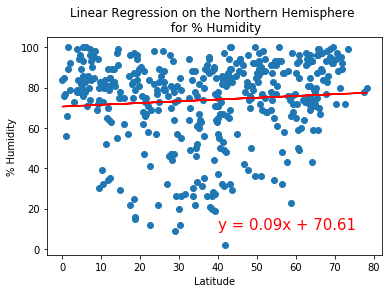

In [24]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))                     

In [25]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.085


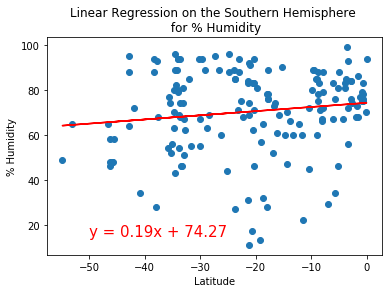

In [26]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))                       

In [27]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.135


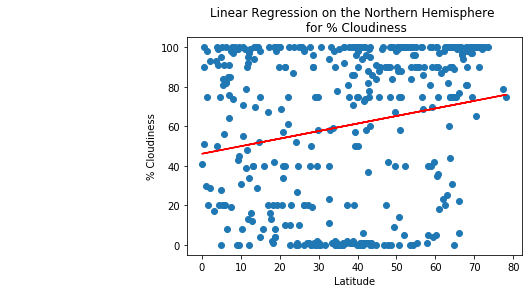

In [28]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))  

In [29]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.198


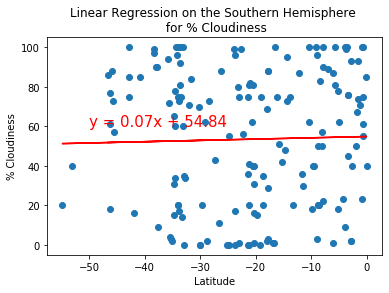

In [30]:
 # Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))  

In [31]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.026


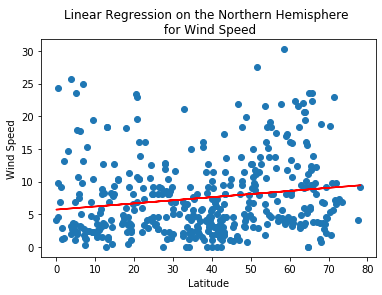

In [32]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [33]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.165


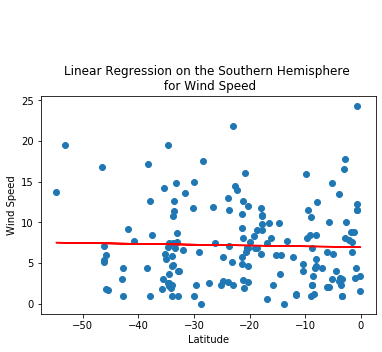

In [34]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.028
